In [18]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support, f1_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.utils import shuffle


In [19]:
df = pd.read_csv('datasetwithoutexploit.csv')

In [20]:
# Groupement des classes
attack_group = {'Infilteration': 'Web attack', 
                'Fuzzers': 'Web attack',
                'Generic': 'Web attack',
                'injection': 'Web attack', 
                'Analysis': 'Web attack',
                'xss': 'Web attack',
                'Benign': 'BENIGN',
                'backdoor': 'BACKDOOR', 
                'scanning': 'SCANNING',
                'mitm': 'MITM', 
                'dos': 'DOS', 
                'ddos': 'DDOS', 
                'bruteforce': 'BRUTEFORCE', 
                'Theft': 'THEFT', 
                'Reconnaissance': 'RECON',
                'Shellcode': 'SHELLCODE',
                'ransomware': 'RANSOMWARE',
                'Bot': 'BOT',
                }
# Creation d'une colomne Attack catégorie
df['Attack_Category'] = df['Attack'].map(lambda x: attack_group[x])
df['Attack_Category'].value_counts()

BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BRUTEFORCE     2485
BACKDOOR       2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: Attack_Category, dtype: int64

In [21]:
df.Label.value_counts()

0    41002
1    40949
Name: Label, dtype: int64

In [22]:
df.Attack_Category.value_counts()

BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BRUTEFORCE     2485
BACKDOOR       2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: Attack_Category, dtype: int64

In [23]:
cols = list(df)
cols.insert(43, cols.pop(cols.index('Attack')))
df = df.loc[:, cols]

In [24]:
X = df.drop(['Label','Attack','Attack_Category'],axis=1).values 
y = df.iloc[:, -3].values.reshape(-1,1)
y=np.ravel(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)


In [26]:
X_test.shape

(16391, 41)

temps entrainement: 12.571461915969849
temps prediction: 0.045426130294799805
Exactitude de XGboost: 0.9999389909096456
Précision de XGboost: 0.9999389983579534
Taux de détection de XGboost: 0.9999389909096456
F1-score de XGboost: 0.9999389909119165


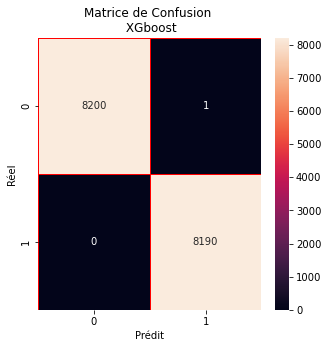

In [27]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 240)
start = time.time()
xg.fit(X_train,y_train)
end = time.time()
training_time = end  - start
xg_score=xg.score(X_test,y_test)
start = time.time()
y_predict=xg.predict(X_test)
end = time.time()
predict_time = end  - start
y_true=y_test
p,r,fs,none= precision_recall_fscore_support(y_true,
                                             y_predict,
                                             average='weighted') 
print('temps entrainement: '+ str(training_time))
print('temps prediction: '+ str(predict_time))
print('Exactitude de XGboost: '+ str(xg_score))
print('Précision de XGboost: '+(str(p)))
print('Taux de détection de XGboost: '+(str(r)))
print('F1-score de XGboost: '+(str(fs)))
#print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n XGboost')
plt.show()